In [2]:
#Importo las librerias de python que necesito
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import time

#Importo sklearn para KNN, PCA y las metricas
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score


In [3]:
#Leo mi dataset
df_train = pd.read_csv("data/fashion-mnist_train.csv")
df_test = pd.read_csv("data/fashion-mnist_test.csv")

print("Dimensiones de base train: ", df_train.shape)
print("Dimensiones de base testn: ", df_test.shape)

Dimensiones de base train:  (60000, 785)
Dimensiones de base testn:  (10000, 785)


In [4]:
clothes = [[0,'T-shirt/top'], [1,'Trouser'], [2,'Pullover'], [3, 'Dress'], 
           [4, 'Coat'], [5, 'Sandal'], [6, 'Shirt'], [7, 'Sneaker'], [8, 'Bag'], [9, 'Ankle boot']]

print("Numeros de cada prenda de ropa")
clothes

Numeros de cada prenda de ropa


[[0, 'T-shirt/top'],
 [1, 'Trouser'],
 [2, 'Pullover'],
 [3, 'Dress'],
 [4, 'Coat'],
 [5, 'Sandal'],
 [6, 'Shirt'],
 [7, 'Sneaker'],
 [8, 'Bag'],
 [9, 'Ankle boot']]

## Exploracion del dataset

In [5]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
#Total de datos que quiero tomar de cada base
#MAX:60000
total_train = 10000
#MAX:10000
total_test = 1000 

In [138]:
#Separo en labels y datos

#Hacer base mas chiquita para probar
df_train = df_train[0:total_train]
df_test = df_test[0:total_test]

train_data = df_train[df_train.columns[1:]].values
train_labels = df_train["label"].values.reshape(-1, 1)

print("Tamaño Train Data:", train_data.shape)
print("Tamaño Train Labels:", train_labels.shape)

Tamaño Train Data: (10000, 784)
Tamaño Train Labels: (10000, 1)


In [139]:
#Separo en labels y datos

test_data = df_test[df_train.columns[1:]].values
test_labels = df_test["label"].values.reshape(-1, 1)

print("Tamaño Test Data:", test_data.shape)
print("Tamaño Test Labels:", test_labels.shape)

Tamaño Test Data: (1000, 784)
Tamaño Test Labels: (1000, 1)


Veo como es un dato aleatorio en 'formato imagen'
Dato numero:  4061
La imagen es:  Pullover


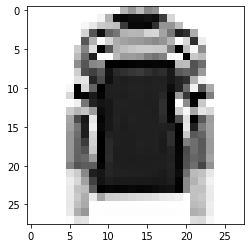

In [140]:
print("Veo como es un dato aleatorio en 'formato imagen'")

num = random.randint(0, total_train - 1)

print("Dato numero: ", num)

image = train_data[num].reshape(28,28)

plt.imshow(image, cmap="Greys")

print("La imagen es: ", clothes[train_labels[num][0]][1])

### Balance de la base

In [141]:
print("Labels de cada dato")
df_train["label"]

Labels de cada dato


0       2
1       9
2       6
3       0
4       3
       ..
9995    2
9996    7
9997    8
9998    5
9999    5
Name: label, Length: 10000, dtype: int64

In [142]:
print("Porcentajes de cada tipo de prenda en la base")
df_train["label"].value_counts(normalize = True)

Porcentajes de cada tipo de prenda en la base


7    0.1037
9    0.1036
6    0.1022
3    0.1012
0    0.1009
5    0.1008
4    0.0979
8    0.0974
1    0.0972
2    0.0951
Name: label, dtype: float64

## KNN sin PCA

In [143]:
numero_ejecuciones = 10

In [144]:
#Mis datos de train son train_data y train_labels y mis datos de test son test_data y test_labels

#Elijo el n para KNN
n = 10
knn = KNeighborsClassifier(n)
times = np.array([])

for i in range(numero_ejecuciones):
    print("Ejecucion", i+1)
    #empiezo a contar el tiempo
    start = time.perf_counter()

    #knn
    knn.fit(train_data, train_labels.flatten())
    res_knn = knn.predict(test_data)

    #termino de contar el tiempo
    end = time.perf_counter()
    print(end-start)
    print("Tiempo: ", end - start, "\n")
    times = np.append(times, [end-start])

print("Media de tiempo de ejecucion knn: ", np.mean(times), "segundos")

print("Tiempo total:", np.sum(times), "segundos")


Ejecucion 1
0.3263279570001032
Tiempo:  0.3263279570001032 

Ejecucion 2
0.2556326909998461
Tiempo:  0.2556326909998461 

Ejecucion 3
0.2593792059997213
Tiempo:  0.2593792059997213 

Ejecucion 4
0.2706793560000733
Tiempo:  0.2706793560000733 

Ejecucion 5
0.2594762369999444
Tiempo:  0.2594762369999444 

Ejecucion 6
0.27560212499975023
Tiempo:  0.27560212499975023 

Ejecucion 7
0.26352089600004547
Tiempo:  0.26352089600004547 

Ejecucion 8
0.26257627900031366
Tiempo:  0.26257627900031366 

Ejecucion 9
0.28223162300037075
Tiempo:  0.28223162300037075 

Ejecucion 10
0.26225934400008555
Tiempo:  0.26225934400008555 

Media de tiempo de ejecucion knn:  0.2717685714000254 segundos
Tiempo total: 2.717685714000254 segundos


### Metricas

In [145]:
print("Con", train_data.shape[0] ,"datos de train y", test_data.shape[0] ,"datos de test ")

Con 10000 datos de train y 1000 datos de test 


In [146]:
print("Accuracy:", accuracy_score(res_knn, test_labels))

Accuracy: 0.833


In [147]:
print("Cohen Kappa:", cohen_kappa_score(res_knn, test_labels))
print("Recall:", recall_score(res_knn, test_labels, average ='micro'))
print("F1:", f1_score(res_knn, test_labels, average ='micro'))

Cohen Kappa: 0.8142998046256028
Recall: 0.833
F1: 0.833


### Comparacion de las predicciones con los valores reales de los datos de test

Text(0.5, 1.0, 'Valores Reales: Cantidad de Imagenes por Tipo de Prenda')

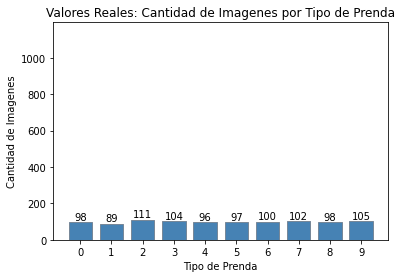

In [148]:
count_original = np.bincount(test_labels.flatten())
a = np.arange(10)

fig, ax = plt.subplots()
p1 = ax.bar(a, count_original, 0.75, color= 'steelblue', edgecolor = 'lightslategray')
ax.set_xticks(a)
maxy = max(count_res) + 100
plt.ylim(top=maxy)
ax.bar_label(p1)

plt.xlabel("Tipo de Prenda")
plt.ylabel("Cantidad de Imagenes")
plt.title("Valores Reales: Cantidad de Imagenes por Tipo de Prenda")


Text(0.5, 1.0, 'Prediccion: Cantidad de Imagenes por Tipo de Prenda')

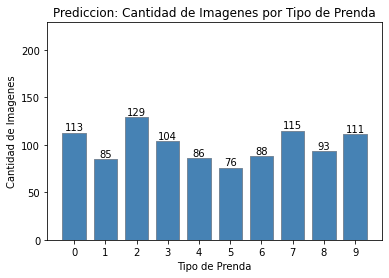

In [149]:
count_res = np.bincount(res_knn.flatten())
a = np.arange(10)

fig, ax = plt.subplots()
p2 = ax.bar(a, count_res, 0.75, color= 'steelblue', edgecolor = 'lightslategray')
ax.set_xticks(a)
maxy = max(count_res) + 100
plt.ylim(top=maxy)
ax.bar_label(p2)

plt.xlabel("Tipo de Prenda")
plt.ylabel("Cantidad de Imagenes")
plt.title("Prediccion: Cantidad de Imagenes por Tipo de Prenda")

## KNN Con PCA

In [150]:
pca = PCA(15)
knn = KNeighborsClassifier(10)

#cuento el tiempo que tardo en hacer pca
start = time.perf_counter()

#aplico pca a los datos
pca.fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)

end = time.perf_counter()
pca_time = end - start 

times = np.array([])

for i in range(numero_ejecuciones):
    print("Ejecucion", i+1)
    start = time.perf_counter()
    #hago knn
    knn.fit(train_pca, train_labels.flatten())
    res_pca = knn.predict(test_pca)

    #Termino de contar el tiempo
    end = time.perf_counter()
    print("Tiempo: ", end - start, "\n")
    times = np.append(times, [end-start])

print("Media de tiempo de ejecucion knn: ", np.mean(times), "segundos")
print("Tiempo total:", np.sum(times) + pca_time, "segundos")

Ejecucion 1
Tiempo:  0.073447020000458 

Ejecucion 2
Tiempo:  0.072004859000117 

Ejecucion 3
Tiempo:  0.07622827099930873 

Ejecucion 4
Tiempo:  0.07229935499981366 

Ejecucion 5
Tiempo:  0.07478363199970772 

Ejecucion 6
Tiempo:  0.07492789200023253 

Ejecucion 7
Tiempo:  0.06979319800029771 

Ejecucion 8
Tiempo:  0.07001226100055646 

Ejecucion 9
Tiempo:  0.07207381499938492 

Ejecucion 10
Tiempo:  0.06986349699946004 

Media de tiempo de ejecucion knn:  0.07254337999993368 segundos
Tiempo total: 0.9135412440000437 segundos


### Metricas

In [151]:
print("Con", train_data.shape[0] ,"datos de train y", test_data.shape[0] ,"datos de test ")

Con 10000 datos de train y 1000 datos de test 


In [152]:
print("Accuracy:", accuracy_score(res_pca, test_labels))

Accuracy: 0.814


In [153]:
print("Cohen Kappa:", cohen_kappa_score(res_pca, test_labels))
print("Recall:", recall_score(res_pca, test_labels, average ='micro'))
print("F1:", f1_score(res_pca, test_labels, average ='micro'))

Cohen Kappa: 0.7932414406402846
Recall: 0.814
F1: 0.8140000000000001


Text(0.5, 1.0, 'Prediccion: Cantidad de Imagenes por Tipo de Prenda')

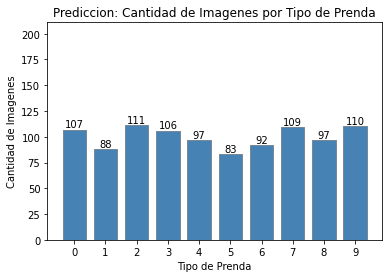

In [154]:
count_res = np.bincount(res_pca.flatten())
a = np.arange(10)

fig, ax = plt.subplots()
p2 = ax.bar(a, count_res, 0.75, color= 'steelblue', edgecolor = 'lightslategray')
ax.set_xticks(a)
maxy = max(count_res) + 100
plt.ylim(top=maxy)
ax.bar_label(p2)

plt.xlabel("Tipo de Prenda")
plt.ylabel("Cantidad de Imagenes")
plt.title("Prediccion: Cantidad de Imagenes por Tipo de Prenda")



## Mejores K y Alpha

### Mejor K para Knn sin PCA

In [175]:
#Corro el experimento 5 veces para evitar picos en tiempos por ruidos del sistema

times = np.zeros(21)
accuracies = np.array([])

for j in range(1,6):
    print("\nEjecucion", j)

    for i in range(1,21):
        knn = KNeighborsClassifier(i)
        #empiezo a contar el tiempo
        start = time.perf_counter()

        #knn
        knn.fit(train_data, train_labels.flatten())
        res_knn = knn.predict(test_data)

        #termino de contar el tiempo
        end = time.perf_counter()
        times[i] = times[i] + (end-start)
        if j == 1:
            accuracies = np.append(accuracies, accuracy_score(res_knn, test_labels))

        print("K =", str(i).zfill(2), "| Accuracy =",accuracy_score(res_knn, test_labels), "| Tiempo =", (end-start))


times = times[1:]
times = times/5

print(accuracies)
print(times)


Ejecucion 1
K = 01 | Accuracy = 0.817 | Tiempo = 0.185898669999915
K = 02 | Accuracy = 0.839 | Tiempo = 0.2062356880005609
K = 03 | Accuracy = 0.835 | Tiempo = 0.2074707040001158
K = 04 | Accuracy = 0.827 | Tiempo = 0.2614676840003085
K = 05 | Accuracy = 0.825 | Tiempo = 0.2537277660003383
K = 06 | Accuracy = 0.829 | Tiempo = 0.26344388400048047
K = 07 | Accuracy = 0.827 | Tiempo = 0.25270064500000444
K = 08 | Accuracy = 0.828 | Tiempo = 0.256230209000023
K = 09 | Accuracy = 0.829 | Tiempo = 0.251128033999521
K = 10 | Accuracy = 0.833 | Tiempo = 0.2477205649993266
K = 11 | Accuracy = 0.824 | Tiempo = 0.25205037599971547
K = 12 | Accuracy = 0.828 | Tiempo = 0.25096316100007243
K = 13 | Accuracy = 0.821 | Tiempo = 0.24873594399923604
K = 14 | Accuracy = 0.827 | Tiempo = 0.24864484899990202
K = 15 | Accuracy = 0.818 | Tiempo = 0.2530587459996241
K = 16 | Accuracy = 0.823 | Tiempo = 0.24588483899970015
K = 17 | Accuracy = 0.816 | Tiempo = 0.2527103819993499
K = 18 | Accuracy = 0.817 | Tie

Text(0.5, 1.0, 'Accuracy para cada N')

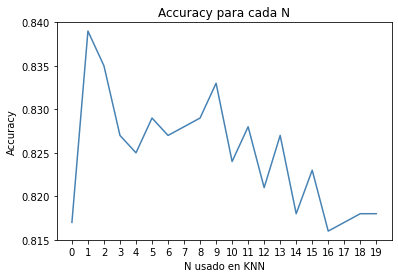

In [156]:
a = np.arange(20)

fig, ax = plt.subplots()
p2 = ax.plot(a, accuracies, color= 'steelblue')
ax.set_xticks(a)
ax.set_ylim(min(accuracies) - 0.001, max(accuracies) + 0.001)

#ax.bar_label(p2)

plt.xlabel("K usado en KNN")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada K")

In [ ]:
a = np.arange(20)

fig, ax = plt.subplots()
p2 = ax.plot(a, times, color= 'steelblue')
ax.set_xticks(a)
ax.set_ylim(min(times) - 0.001, max(times) + 0.001)

#ax.bar_label(p2)

plt.xlabel("K usado en KNN")
plt.ylabel("Segundos")
plt.title("Tiempo para cada K")

### Combinacion Knn y PCA

#### Pruebo varios alphas para los distintos k

In [268]:
#Corro el experimento 5 veces para evitar picos en tiempos por ruidos del sistema

pca_times = np.array([])
times = np.zeros([26, 26])
accuracies = np.zeros([26,26])

for k in range(1,2):
    
    print("\nEjecucion", k)

    #Itero sobre Alphas de PCA
    for j in range(1,26):

        #cuento el tiempo que tardo en hacer pca
        start = time.perf_counter()

        #aplico pca a los datos
        pca = PCA(j)
        pca.fit(train_data)
        train_pca = pca.transform(train_data)
        test_pca = pca.transform(test_data)

        end = time.perf_counter()
        pca_times = np.append(pca_times, end - start) 
        
        print("\nAlpha =", j, "| Tiempo en hacer PCA =", end - start)
        
        #Itero sobre K de Knn
        for i in range(1, 26):
            
            knn = KNeighborsClassifier(i)
            #empiezo a contar el tiempo
            start = time.perf_counter()

            #knn
            knn.fit(train_pca, train_labels.flatten())
            res_knn = knn.predict(test_pca)

            #termino de contar el tiempo
            end = time.perf_counter()
            times[j][i] = times[j][i] + (end-start)
            if k == 1:
                accuracies[j][i] = accuracy_score(res_knn, test_labels)

            print("K =", str(i).zfill(2), "| Accuracy =",accuracy_score(res_knn, test_labels), "| Tiempo =", (end-start))

print(accuracies)
print(times)


Ejecucion 1

Alpha = 1 | Tiempo en hacer PCA = 0.1595556159991247
K = 01 | Accuracy = 0.217 | Tiempo = 0.03513697299968044
K = 02 | Accuracy = 0.219 | Tiempo = 0.0377530800014938
K = 03 | Accuracy = 0.24 | Tiempo = 0.03685329600011755
K = 04 | Accuracy = 0.232 | Tiempo = 0.036943346000043675
K = 05 | Accuracy = 0.226 | Tiempo = 0.03757829200003471
K = 06 | Accuracy = 0.229 | Tiempo = 0.0280050029996346
K = 07 | Accuracy = 0.245 | Tiempo = 0.025976025999625563
K = 08 | Accuracy = 0.252 | Tiempo = 0.02614537200133782
K = 09 | Accuracy = 0.245 | Tiempo = 0.029150158999982523
K = 10 | Accuracy = 0.265 | Tiempo = 0.027327652998792473
K = 11 | Accuracy = 0.265 | Tiempo = 0.027462772000944824
K = 12 | Accuracy = 0.262 | Tiempo = 0.027285915999527788
K = 13 | Accuracy = 0.267 | Tiempo = 0.026889386001130333
K = 14 | Accuracy = 0.273 | Tiempo = 0.026919496998743853
K = 15 | Accuracy = 0.255 | Tiempo = 0.027224983999985852
K = 16 | Accuracy = 0.258 | Tiempo = 0.026691893001043354
K = 17 | Accur

K = 13 | Accuracy = 0.777 | Tiempo = 0.040244013000119594
K = 14 | Accuracy = 0.777 | Tiempo = 0.03940686700116203
K = 15 | Accuracy = 0.779 | Tiempo = 0.03842334999899322
K = 16 | Accuracy = 0.776 | Tiempo = 0.03877425099926768
K = 17 | Accuracy = 0.771 | Tiempo = 0.03878160600106639
K = 18 | Accuracy = 0.771 | Tiempo = 0.0392762160008715
K = 19 | Accuracy = 0.769 | Tiempo = 0.04334832600034133
K = 20 | Accuracy = 0.774 | Tiempo = 0.04005862900157808
K = 21 | Accuracy = 0.766 | Tiempo = 0.04061857800115831
K = 22 | Accuracy = 0.767 | Tiempo = 0.040570934001152636
K = 23 | Accuracy = 0.765 | Tiempo = 0.04070683200006897
K = 24 | Accuracy = 0.761 | Tiempo = 0.04265871200004767
K = 25 | Accuracy = 0.766 | Tiempo = 0.043182778001209954

Alpha = 7 | Tiempo en hacer PCA = 0.16192079299980833
K = 01 | Accuracy = 0.717 | Tiempo = 0.03873581399966497
K = 02 | Accuracy = 0.744 | Tiempo = 0.040182057999118115
K = 03 | Accuracy = 0.756 | Tiempo = 0.04080841199902352
K = 04 | Accuracy = 0.77 | Tie

K = 04 | Accuracy = 0.816 | Tiempo = 0.05696752399853722
K = 05 | Accuracy = 0.807 | Tiempo = 0.05807999100034067
K = 06 | Accuracy = 0.805 | Tiempo = 0.05360349900001893
K = 07 | Accuracy = 0.818 | Tiempo = 0.05368442699909792
K = 08 | Accuracy = 0.816 | Tiempo = 0.060958129999562516
K = 09 | Accuracy = 0.816 | Tiempo = 0.056819931998688844
K = 10 | Accuracy = 0.815 | Tiempo = 0.05839204500080086
K = 11 | Accuracy = 0.805 | Tiempo = 0.05676997899900016
K = 12 | Accuracy = 0.81 | Tiempo = 0.06123913900046318
K = 13 | Accuracy = 0.811 | Tiempo = 0.059168965999560896
K = 14 | Accuracy = 0.809 | Tiempo = 0.05900823199954175
K = 15 | Accuracy = 0.807 | Tiempo = 0.05996560099993076
K = 16 | Accuracy = 0.799 | Tiempo = 0.06330298899956688
K = 17 | Accuracy = 0.806 | Tiempo = 0.06600566299857746
K = 18 | Accuracy = 0.807 | Tiempo = 0.06751436499871488
K = 19 | Accuracy = 0.812 | Tiempo = 0.06572900300125184
K = 20 | Accuracy = 0.805 | Tiempo = 0.06474203200014017
K = 21 | Accuracy = 0.806 | T

K = 19 | Accuracy = 0.815 | Tiempo = 0.1841789999998582
K = 20 | Accuracy = 0.815 | Tiempo = 0.17102490499928535
K = 21 | Accuracy = 0.816 | Tiempo = 0.1921865379990777
K = 22 | Accuracy = 0.821 | Tiempo = 0.2068261820004409
K = 23 | Accuracy = 0.819 | Tiempo = 0.18954055900030653
K = 24 | Accuracy = 0.818 | Tiempo = 0.184578665999652
K = 25 | Accuracy = 0.815 | Tiempo = 0.17789790800088667

Alpha = 18 | Tiempo en hacer PCA = 0.18467973999941023
K = 01 | Accuracy = 0.795 | Tiempo = 0.1257832840001356
K = 02 | Accuracy = 0.799 | Tiempo = 0.14398257899847522
K = 03 | Accuracy = 0.821 | Tiempo = 0.1495671169996058
K = 04 | Accuracy = 0.817 | Tiempo = 0.18932723599937162
K = 05 | Accuracy = 0.815 | Tiempo = 0.18363963499905367
K = 06 | Accuracy = 0.816 | Tiempo = 0.22581115499997395
K = 07 | Accuracy = 0.818 | Tiempo = 0.2076865369999723
K = 08 | Accuracy = 0.819 | Tiempo = 0.18590118000065559
K = 09 | Accuracy = 0.81 | Tiempo = 0.18469623500095622
K = 10 | Accuracy = 0.818 | Tiempo = 0.17

K = 09 | Accuracy = 0.818 | Tiempo = 0.18018541099991126
K = 10 | Accuracy = 0.817 | Tiempo = 0.16954757500025153
K = 11 | Accuracy = 0.825 | Tiempo = 0.1778457630007324
K = 12 | Accuracy = 0.822 | Tiempo = 0.1681944520005345
K = 13 | Accuracy = 0.823 | Tiempo = 0.1797298179990321
K = 14 | Accuracy = 0.826 | Tiempo = 0.17196713700104738
K = 15 | Accuracy = 0.82 | Tiempo = 0.18124936899948807
K = 16 | Accuracy = 0.824 | Tiempo = 0.16475500900014595
K = 17 | Accuracy = 0.823 | Tiempo = 0.18023144700055127
K = 18 | Accuracy = 0.828 | Tiempo = 0.1675349399993138
K = 19 | Accuracy = 0.819 | Tiempo = 0.180664199999228
K = 20 | Accuracy = 0.82 | Tiempo = 0.16683057900081621
K = 21 | Accuracy = 0.815 | Tiempo = 0.18042970200076525
K = 22 | Accuracy = 0.821 | Tiempo = 0.16893220400015707
K = 23 | Accuracy = 0.812 | Tiempo = 0.17959030800011533
K = 24 | Accuracy = 0.823 | Tiempo = 0.16944453600081033
K = 25 | Accuracy = 0.82 | Tiempo = 0.18165319899890164

Alpha = 24 | Tiempo en hacer PCA = 0.16

In [269]:
times = times[1:,1:]

In [270]:
accuracies.shape

(26, 26)

In [271]:
accuracies_new = accuracies[1:,1:]
df = pd.DataFrame(accuracies_new, index = np.arange(1,26), columns = np.arange(1,26))

In [272]:
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
1,0.217,0.219,0.240,0.232,0.226,0.229,0.245,0.252,0.245,0.265,...,0.258,0.257,0.264,0.274,0.270,0.280,0.277,0.278,0.280,0.281
2,0.464,0.474,0.497,0.506,0.501,0.497,0.522,0.529,0.545,0.543,...,0.562,0.559,0.561,0.558,0.557,0.557,0.549,0.552,0.549,0.553
3,0.577,0.589,0.601,0.604,0.628,0.618,0.642,0.642,0.630,0.637,...,0.656,0.648,0.659,0.647,0.657,0.652,0.647,0.650,0.651,0.658
4,0.647,0.659,0.689,0.697,0.715,0.729,0.728,0.724,0.724,0.728,...,0.720,0.717,0.725,0.724,0.715,0.718,0.723,0.708,0.714,0.715
5,0.695,0.714,0.729,0.742,0.746,0.757,0.748,0.760,0.754,0.753,...,0.753,0.758,0.757,0.763,0.759,0.752,0.761,0.751,0.752,0.754
6,0.710,0.728,0.753,0.776,0.776,0.786,0.788,0.789,0.790,0.788,...,0.776,0.771,0.771,0.769,0.774,0.766,0.767,0.765,0.761,0.766
7,0.717,0.744,0.756,0.770,0.776,0.779,0.774,0.773,0.774,0.775,...,0.775,0.778,0.785,0.781,0.786,0.779,0.783,0.785,0.781,0.780
8,0.736,0.763,0.776,0.779,0.790,0.785,0.784,0.793,0.789,0.791,...,0.795,0.787,0.790,0.786,0.786,0.780,0.779,0.777,0.777,0.775
9,0.754,0.773,0.794,0.803,0.799,0.785,0.792,0.789,0.794,0.792,...,0.795,0.793,0.796,0.791,0.796,0.794,0.794,0.790,0.794,0.797
10,0.764,0.780,0.795,0.802,0.794,0.799,0.805,0.808,0.808,0.801,...,0.805,0.802,0.800,0.802,0.799,0.800,0.798,0.798,0.790,0.791


In [273]:
df.iloc[5,5]

0.786

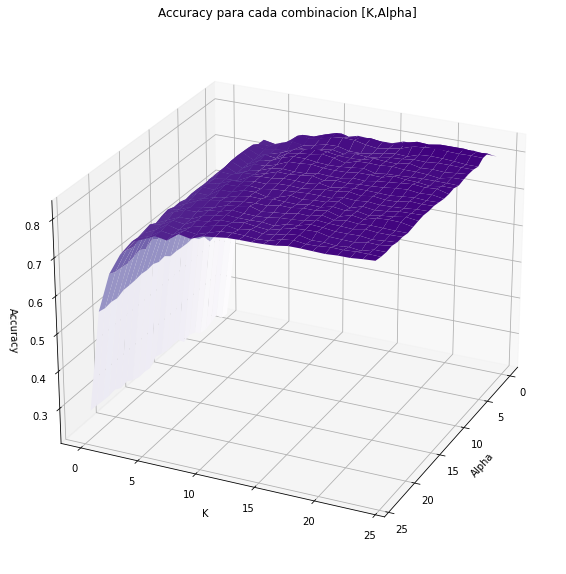

In [304]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#Defino Ejes
x = np.arange(0,25,1)
y = np.arange(0,25,1)
z = df.iloc[x,y]
x, y = np.meshgrid(x, y)

#Defino labels
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Alpha")
ax.set_ylabel("K")
ax.set_zlabel("Accuracy")
ax.set_title("Accuracy para cada combinacion [K,Alpha]")

#Defino colormap
mycmap = plt.get_cmap('Purples')

#Hago Grafico
ax.plot_surface(x,y,z, cmap = mycmap)
ax.view_init(25, 25)
plt.show()